In [40]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import keras
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [41]:
cancer=pd.read_csv('gudbest.csv')

In [42]:
cancer

,App,SpG,Off,Rating,Overall rating,BP,FINISHING,CLASS
0,0.745763,0.527027,0.416667,0.540541,0.809524,0.000000,0.916667,0
1,0.457627,0.527027,0.166667,0.530405,0.761905,0.333333,0.888889,0
2,0.508475,0.378378,0.083333,0.527027,0.809524,0.333333,0.805556,1
3,0.830508,0.567568,0.333333,0.527027,0.809524,0.000000,0.916667,0
4,0.338983,0.527027,0.125000,0.523649,0.642857,0.000000,0.791667,1
...,...,...,...,...,...,...,...,...
5373,0.389831,0.391892,0.041667,0.361486,0.619048,0.333333,0.694444,2
5374,0.254237,0.108108,0.000000,0.250000,0.428571,0.333333,0.513889,2
5375,0.118644,0.229730,0.125000,0.209459,0.476190,0.000000,0.652778,2
5376,0.169492,0.162162,0.041667,0.148649,0.595238,0.333333,0.638889,2


In [45]:
x=cancer.iloc[:,0:7]
y=cancer.iloc[:,7]

In [46]:
#plt.figure(figsize=(27,13))
#sns.heatmap(x.corr(),annot=True,cmap='summe')

In [47]:
# Below are iterations of the above chart created with different seaborn color palettes.
# Take a look at the seaborn website, linked at the very top above, for more color palette
# examples and ways you can customize your own palette
# Here's a more typical palette
#sns.FacetGrid(cancer, hue="CLASS", palette="hls", size=5) \
  # .map(plt.scatter, "Overall rating", "Rating") \
   #.add_legend()

# Here's a palette that, per my understanding, is more "color blind safe", aka more visible
# for people with colorblindness
# This set comes from Color Brewer, which helps you create color sets that are color blind
# safe, among other palettes!


In [48]:
# Here's a violinplot -- this shows the density of data at each primary split, where 
# denser sections are fatter than more sparse sections
#sns.violinplot(x="CLAss", y="Overall rating	", palette="husl", data=cancer)

In [49]:
x.shape,y.shape

((5378, 7), (5378,))

In [50]:
#Train test Split

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [52]:
# Class imbalance using SMOTE

In [53]:
oversample = SMOTE(random_state=42)
X_r,y_r=oversample.fit_resample(X_train,y_train)

In [54]:
y_test.shape,X_test.shape,X_r.shape,y_r.shape

((1076,), (1076, 7), (8946, 7), (8946,))

In [55]:
#Preparing a confusion Matrix

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [58]:
from sklearn import metrics
import numpy as np
import itertools

In [61]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [62]:
#Logisitic Regression

In [113]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

Accuracy of LogisticRegression  classifier on training set: 0.85
Accuracy of LogisticRegression classifier on test set: 0.83
accuracy:   0.833
Confusion matrix, without normalization


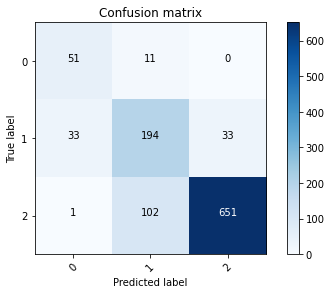

In [115]:
from sklearn.linear_model import  LogisticRegression
logreg=LogisticRegression(C=1e5, max_iter=10000)
logreg.fit(X_r, y_r)
pred = logreg.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy of LogisticRegression  classifier on training set: {:.2f}'
     .format(logreg.score(X_r, y_r)))
print('Accuracy of LogisticRegression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['0', '1','2'])

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.60      0.82      0.69        62
           1       0.63      0.75      0.68       260
           2       0.95      0.86      0.91       754

    accuracy                           0.83      1076
   macro avg       0.73      0.81      0.76      1076
weighted avg       0.85      0.83      0.84      1076



In [117]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [118]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logreg, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [119]:
best_clf = clf.fit(X_r, y_r)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 639 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 1266 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1890 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3303 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 4056 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:  6.8min finished
C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [120]:
best_clf.best_estimator_

LogisticRegression(C=0.0018329807108324356, penalty='none', solver='sag')

In [121]:
predi = best_clf.predict(X_test)

Accuracy of LogisticRegression  classifier on training set With hyperparameterized method : 0.852
Accuracy of LogisticRegression classifier on test set hyperparameterized method: 0.833
accuracy:   0.833
Confusion matrix, without normalization


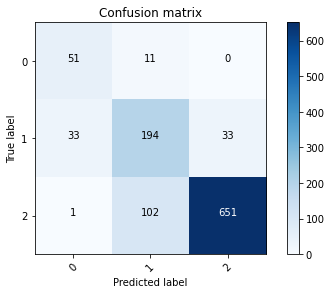

In [122]:
score = metrics.accuracy_score(y_test, predi)
print('Accuracy of LogisticRegression  classifier on training set With hyperparameterized method : {:.3f}'
     .format(best_clf.score(X_r, y_r)))
print('Accuracy of LogisticRegression classifier on test set hyperparameterized method: {:.3f}'
     .format(best_clf.score(X_test, y_test)))
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, predi)
plot_confusion_matrix(cm, classes=['0', '1','2'])

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.60      0.82      0.69        62
           1       0.62      0.75      0.68       260
           2       0.95      0.86      0.90       754

    accuracy                           0.83      1076
   macro avg       0.73      0.81      0.76      1076
weighted avg       0.85      0.83      0.84      1076



In [27]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

Accuracy of support new vector machine   classifier on training set: 0.84
Accuracy of support new vector machine classifier on test set: 0.83
accuracy:   0.832
Confusion matrix, without normalization


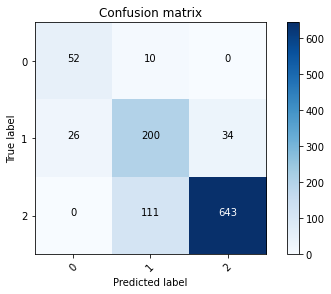

In [28]:
from sklearn.naive_bayes import GaussianNB
svmmodel_w2v= GaussianNB()
svmmodel_w2v=svmmodel_w2v.fit(X_r, y_r)
pred = svmmodel_w2v.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy of naive bayes   classifier on training set: {:.2f}'
     .format(logreg.score(X_r, y_r)))
print('Accuracy of naive bayes classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['0', '1','2'])

In [29]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.67      0.84      0.74        62
           1       0.62      0.77      0.69       260
           2       0.95      0.85      0.90       754

    accuracy                           0.83      1076
   macro avg       0.75      0.82      0.78      1076
weighted avg       0.85      0.83      0.84      1076



In [30]:
#SVM Model

Accuracy of support new vector machine   classifier on training set: 0.84
Accuracy of support new vector machine classifier on test set: 0.83
accuracy:   0.781
Confusion matrix, without normalization


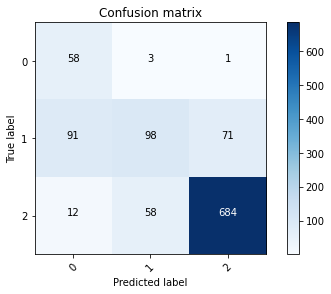

In [31]:
from sklearn.svm import LinearSVC
svmmodel_w2v= LinearSVC(C=0.01, multi_class='ovr', max_iter=10000, 
                        class_weight='balanced',penalty='l2' )
svmmodel_w2v=svmmodel_w2v.fit(X_r, y_r)
pred = svmmodel_w2v.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy of support new vector machine   classifier on training set: {:.2f}'
     .format(logreg.score(X_r, y_r)))
print('Accuracy of support new vector machine classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['0', '1','2'])

In [32]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.36      0.94      0.52        62
           1       0.62      0.38      0.47       260
           2       0.90      0.91      0.91       754

    accuracy                           0.78      1076
   macro avg       0.63      0.74      0.63      1076
weighted avg       0.80      0.78      0.78      1076



In [175]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [136]:
std_slc = StandardScaler()
pca = decomposition.PCA()

In [176]:
dec_tree = tree.DecisionTreeClassifier()

In [177]:
pipe = Pipeline(steps=[('std_slc', std_slc),('pca', pca), ('dec_tree', dec_tree)])

In [178]:
n_components = list(range(1,x.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
    

In [179]:
parameters = dict(dec_tree__criterion=criterion,dec_tree__max_depth=max_depth)

In [180]:
 clf_GS = GridSearchCV(pipe, parameters)

In [1]:
clf_GS.fit(X_r, y_r)

NameError: name 'clf_GS' is not defined

In [189]:
clf_GS.best_estimator_

Pipeline(steps=[('std_slc', StandardScaler()), ('pca', PCA()),
                ('dec_tree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=12))])

In [182]:
newpred = clf_GS.predict(X_test)

Accuracy of Decision Tree  classifier on training set With hyperparameterized method : 0.966
Accuracy of Decision Tree on test set hyperparameterized method: 0.80669
accuracy:   0.833
Confusion matrix, without normalization


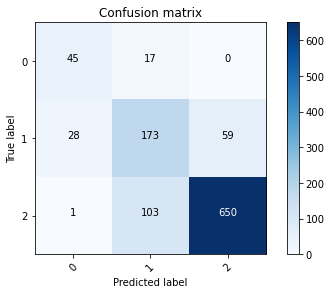

In [187]:
score = metrics.accuracy_score(y_test, predi)
print('Accuracy of Decision Tree  classifier on training set With hyperparameterized method : {:.3f}'
     .format(clf_GS.score(X_r, y_r)))
print('Accuracy of Decision Tree on test set hyperparameterized method: {:.5f}'
     .format(clf_GS.score(X_test, y_test)))
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, newpred)
plot_confusion_matrix(cm, classes=['0', '1','2'])

In [184]:
print(classification_report(y_test, newpred))

              precision    recall  f1-score   support

           0       0.61      0.73      0.66        62
           1       0.59      0.67      0.63       260
           2       0.92      0.86      0.89       754

    accuracy                           0.81      1076
   macro avg       0.71      0.75      0.73      1076
weighted avg       0.82      0.81      0.81      1076



In [185]:
#Decision Tree

Accuracy of Decision tree  classifier on training set: 0.90
Accuracy of Decsion Tree classifier on test set: 0.80
accuracy:   0.798
Confusion matrix, without normalization


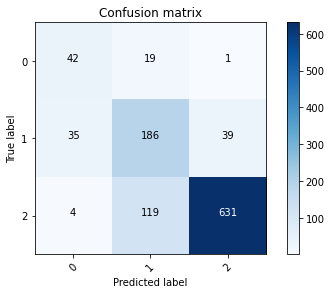

In [186]:
from sklearn.tree import DecisionTreeClassifier 
dec=DecisionTreeClassifier(max_depth=10)
dec.fit(X_r, y_r)
pred = dec.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy of Decision tree  classifier on training set: {:.2f}'
     .format(dec.score(X_train, y_train)))
print('Accuracy of Decsion Tree classifier on test set: {:.2f}'
     .format(dec.score(X_test, y_test)))
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['0', '1','2'])

In [156]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69        62
           1       0.60      0.74      0.66       260
           2       0.93      0.85      0.89       754

    accuracy                           0.82      1076
   macro avg       0.73      0.78      0.75      1076
weighted avg       0.84      0.82      0.82      1076



In [30]:
#Random Forest

Accuracy of RandomForest  classifier on training set: 1.00
Accuracy of RandomForest classifier on test set: 0.88
accuracy:   0.875
Confusion matrix, without normalization


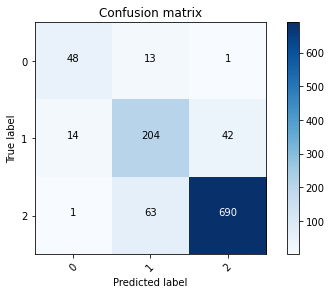

In [31]:
from sklearn.ensemble import RandomForestClassifier
Random=RandomForestClassifier(n_estimators=400, n_jobs=4)
Random.fit(X_r, y_r)
pred = Random.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy of RandomForest  classifier on training set: {:.2f}'
     .format(Random.score(X_r, y_r)))
print('Accuracy of RandomForest classifier on test set: {:.2f}'
     .format(Random.score(X_test, y_test)))
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['0', '1','2'])

In [38]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.65      0.77      0.71        62
           1       0.72      0.75      0.73       260
           2       0.94      0.92      0.93       754

    accuracy                           0.87      1076
   macro avg       0.77      0.81      0.79      1076
weighted avg       0.87      0.87      0.87      1076



In [39]:
#Ada Boost

Accuracy of AdaBoostClassifier  classifier on training set: 0.83
Accuracy of AdaBoostClassifier classifier on test set: 0.81
accuracy:   0.813
Confusion matrix, without normalization


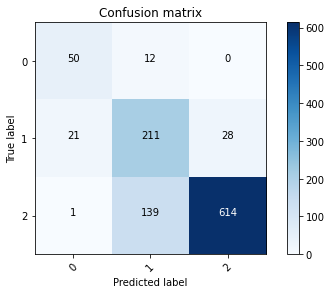

In [40]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
ada=abc=AdaBoostClassifier(n_estimators=200,random_state=1,learning_rate=0.1)
ada.fit(X_r, y_r)
pred = ada.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy of AdaBoostClassifier  classifier on training set: {:.2f}'
     .format(ada.score(X_r, y_r)))
print('Accuracy of AdaBoostClassifier classifier on test set: {:.2f}'
     .format(ada.score(X_test, y_test)))
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['0', '1','2'])

In [41]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.69      0.81      0.75        62
           1       0.58      0.81      0.68       260
           2       0.96      0.81      0.88       754

    accuracy                           0.81      1076
   macro avg       0.74      0.81      0.77      1076
weighted avg       0.85      0.81      0.82      1076



In [42]:
#Gradient Boosting

Accuracy of Gradient Boosting Classifier on training set: 0.87
Accuracy of Gradient Boosting Classifier on test set: 0.82
accuracy:   0.818
Confusion matrix, without normalization


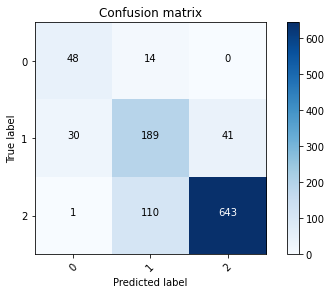

In [43]:
gbc=GradientBoostingClassifier(n_estimators=200,random_state=1,learning_rate=0.01)
gbc.fit(X_r, y_r)
pred = gbc.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy of Gradient Boosting Classifier on training set: {:.2f}'
     .format(gbc.score(X_r, y_r)))
print('Accuracy of Gradient Boosting Classifier on test set: {:.2f}'
     .format(gbc.score(X_test, y_test)))
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['0', '1','2'])

In [44]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.61      0.77      0.68        62
           1       0.60      0.73      0.66       260
           2       0.94      0.85      0.89       754

    accuracy                           0.82      1076
   macro avg       0.72      0.78      0.74      1076
weighted avg       0.84      0.82      0.83      1076

